In [ ]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
#from tensorboardX import SummaryWriter
HIDDEN_SIZE = 128
BATCh_SIZE = 16
PERCENTILE = 70

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()

    def forward(self, x):

      return x

In [ ]:
net = Net(4,128,2)
print(net)

Net(
  (fc1): Linear(in_features=4, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


In [ ]:
class Episode:
    def __init__(self):
        self.total_reward = 0
        self.observations = []
        self.actions = []

In [ ]:
env = gym.make('CartPole-v1') 
obs = env.reset()
model = Net(4,HIDDEN_SIZE,2)
actions_val = model(torch.FloatTensor([obs]))
softmax = nn.Softmax(dim=1)
# softmax

In [ ]:
p = softmax(actions_val)
print(p.data.numpy()[0])
print(np.random.choice(2,p=p.data.numpy()[0]))




[0.5238899  0.47611004]
0


### Генерация пакета

In [ ]:

def episode_batch_generator(env, model, batch_size):
    batch = []
    obs = env.reset()
    episode = Episode()
    softmax = nn.Softmax()
    while True:
        actions_val = model(torch.FloatTensor([obs]))
        actions_prob = softmax(actions_val)
        actions_prob = actions_prob.data.numpy()[0]
        action = np.random.choice(env.action_space.n, p=actions_prob)
        obs_next, reward, done, _ = env.step(action)
        episode.total_reward += reward
        episode.actions.append(action)
        episode.observations.append(obs)
        if done:
            if len(batch) == batch_size:
                yield batch
                batch = []
            batch.append(episode)
            episode = Episode()
            obs_next = env.reset()

        obs = obs_next

###  Percentile

In [ ]:
def filter_elite_episodes(batch, min_reward_percentice):
    actions, observations = [], []
    rewards = list(map(lambda e: e.total_reward, batch))
    reward_boundary = np.percentile(rewards, min_reward_percentice)
    observations, action_spaces = [], []
    for episode in batch:
        if episode.total_reward < reward_boundary:
            continue

        observations.extend(episode.observations)
        actions.extend(episode.actions)
    mean_rewards = np.mean(rewards)
    return torch.FloatTensor(observations), torch.LongTensor(actions), mean_rewards

In [ ]:
def train():
    env = gym.make('CartPole-v1') # ,new_step_api=True
    model = Net(env.observation_space.shape[0], HIDDEN_SIZE, env.action_space.n)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()
   # writer = SummaryWriter()
    for itr, batch in enumerate(episode_batch_generator(env, model, BATCh_SIZE)):
        observations, actions, mean_rewards = filter_elite_episodes(batch, PERCENTILE)
        optimizer.zero_grad()
        actions_val = model(observations)
        loss = loss_fn(actions_val, actions)
        loss.backward()
        optimizer.step()
       # writer.add_scalar('loss', loss.item(), itr)
       # writer.add_scalar('reward', mean_rewards.item(), itr)
        print(f'\rItr:{itr}, loss :{loss}, mean reward: {mean_rewards}', end='')
        if mean_rewards > 199:
            print('\nSolved')
            break

In [ ]:
train()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Itr:45, loss :0.5322495102882385, mean reward: 225.875
Solved


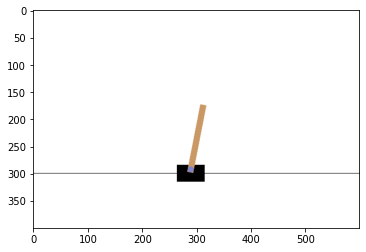

In [50]:
#!pip install gym[classic_control]
import pygame
pygame.init()
import sys, os


import time
import matplotlib.pyplot as plt
%matplotlib inline
env = gym.make('CartPole-v1')

state = env.reset()
img = plt.imshow(env.render(mode="rgb_array"))

for t in range(1000):
    actions_val = model(torch.FloatTensor([state]))
    
    actions_prob = softmax(actions_val)
    actions_prob = actions_prob.data.numpy()[0]
    action = np.random.choice(env.action_space.n, p=actions_prob)
    env.render(mode="rgb_array") # mode="rgb_array"
    plt.imshow(env.render(mode="rgb_array"))
    time.sleep(0.1)
    
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()

list(batch)